In [1]:
%load_ext autoreload
%autoreload 2
import tnetwork as tn
import pandas as pd
import seaborn as sns
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def compute_stats(ps,tts,functions,names):
    sn1 = []
    sn2 = []
    ls = []
    ig=[]
    updates=[]


    scores = []

    for tt in tts:
        print("====",tt," ====")
        ps_tt=ps.aggregate_sliding_window(tt,weighted=False)
        #print(ps_tt.snapshots())
        ps_ig = ps_tt.to_DynGraphIG(sn_duration=tt)
        #print(ps_ig.interactions())
        #((score_sn_m,score_sn_e),score_ls,score_ig,score_udpate) = entropies(ps_tt,ps_ig)
        scores.append([tt]+[f(ps_tt,ps_ig) for f in functions])



    df = pd.DataFrame.from_records(scores,columns=["tts"]+names)
    return df

In [3]:
def score_sn_m(g_sn,g_ig):
    return(tn.code_length_SN_M(g_sn))
def score_sn_e(g_sn,g_ig):
    return(tn.code_length_SN_E(g_sn))
def score_ig(g_sn,g_ig):
    return(tn.code_length_IG(g_ig))
#def score_update(g_sn,g_ig):
#    return(tn.code_length_update(g_sn))
def score_ls(g_sn,g_ig):
    return tn.code_length_LS(g_sn)

def stability(g_sn,g_ig):
    return(g_sn.stability())
def synchronicity(g_sn,g_ig):
    return g_sn.synchronicity()

In [4]:
functions = [score_ls,score_sn_m,score_ig,score_sn_e]
names= ["$LS$","$SN_M$","$IG$","$SN_E$"]

In [7]:
h = 3600
d=h*24
tts=[5*d,4*d,2*d,d,h*12,h*6,h*4,h*2,h,60*30,60*15,60*5,60*2,60,20]

#functions=[score_ls,score_sn_m,score_ig,score_sn_e,score_update,stability,synchronicity]
#names= ["$LS$","$SN$","$IG$","sn_e","update","stability","synchronicity"]


#tts = [int(day)]

SP2012 = compute_stats(tn.graph_socioPatterns2012(format=tn.DynGraphSN),tts,functions,names)

graph will be loaded as:  <class 'tnetwork.dyn_graph.dyn_graph_sn.DynGraphSN'>
==== 432000  ====
==== 345600  ====
==== 172800  ====
==== 86400  ====
==== 43200  ====
==== 21600  ====
==== 14400  ====
==== 7200  ====
==== 3600  ====
==== 1800  ====
==== 900  ====
==== 300  ====
==== 120  ====
==== 60  ====
==== 20  ====


In [8]:
SP2012

,tts,$LS$,$SN_M$,$IG$,$SN_E$
0,432000,38260.827748,3.770583e+04,43819.678003,41641.719509
1,345600,41778.246302,3.992858e+04,46959.827748,47278.347925
2,172800,47225.581382,4.437544e+04,52894.032978,56919.725760
3,86400,52463.827748,5.104783e+04,62051.656618,62775.761535
4,43200,57016.950298,6.217193e+04,74340.875470,63159.476200
5,21600,64642.543416,7.997607e+04,83456.420221,74186.665789
6,14400,69684.348637,9.555843e+04,88403.620180,80806.880079
7,7200,79899.607713,1.423189e+05,99502.517989,92200.158274
8,3600,91807.099663,2.247365e+05,116729.650813,105078.993169
9,1800,108304.552144,4.007793e+05,136025.259110,123062.941924


In [11]:
h = 3600
d=h*24
tts=[2*d,d,h*12,h*6,h*4,h*2,h,60*30,60*15,60*5,60*2,60,20]

#functions=[score_ls,score_sn_m,score_ig,score_sn_e,score_update,stability,synchronicity]
#names= ["$LS$","$SN$","$IG$","sn_e","update","stability","synchronicity"]


#tts = [int(day)]

Hospital = compute_stats(tn.graph_socioPatterns_Hospital(format=tn.DynGraphSN),tts,functions,names)

graph will be loaded as:  <class 'tnetwork.dyn_graph.dyn_graph_sn.DynGraphSN'>
==== 172800  ====
==== 86400  ====
==== 43200  ====
==== 21600  ====
==== 14400  ====
==== 7200  ====
==== 3600  ====
==== 1800  ====
==== 900  ====
==== 300  ====
==== 120  ====
==== 60  ====
==== 20  ====


In [12]:
h = 3600
d=h*24
tts=[d,h*12,h*6,h*4,h*2,h,60*30,60*15,60*5,60*2,60,20]

#functions=[score_ls,score_sn_m,score_ig,score_sn_e,score_update,stability,synchronicity]
#names= ["$LS$","$SN$","$IG$","sn_e","update","stability","synchronicity"]


#tts = [int(day)]

Primary_School = compute_stats(tn.graph_socioPatterns_Primary_School(tn.DynGraphSN),tts,functions,names)

graph will be loaded as:  <class 'tnetwork.dyn_graph.dyn_graph_sn.DynGraphSN'>
==== 86400  ====
==== 43200  ====
==== 21600  ====
==== 14400  ====
==== 7200  ====
==== 3600  ====
==== 1800  ====
==== 900  ====
==== 300  ====
==== 120  ====
==== 60  ====
==== 20  ====


In [35]:
h = 3600
d=h*24
tts=[d*365,d*30,d*7,d,h,60]
#functions=[score_ls,score_sn_m,score_ig,score_sn_e,score_update,stability,synchronicity]
#names= ["$LS$","$SN$","$IG$","sn_e","update","stability","synchronicity"]


#tts = [int(day)]

ENRON = compute_stats(
    tn.read_interactions("/Users/remycazabet/Downloads/ia-enron-employees/ia-enron-employees.edges",format=tn.DynGraphSN,sep=" ",columns=["n1","n2","?","time"])
    ,tts,functions,names)

/Users/remycazabet/Documents/GitHub/tnetwork/tnetwork/readwrite/generic_io.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interactions["e"] = interactions.apply(lambda row: tuple(sorted([row[source], row[target]])), axis=1)


graph will be loaded as:  <class 'tnetwork.dyn_graph.dyn_graph_sn.DynGraphSN'>
==== 31536000  ====
==== 2592000  ====
==== 604800  ====
==== 86400  ====
==== 3600  ====
==== 60  ====


In [20]:
largeG = tn.read_interactions("/Users/remycazabet/Downloads/mammalia-primate-association/mammalia-primate-association.edges",sep=" ",columns=["n1","n2","__","time"])

nb_interactions: 1340 nb_unique_Edges: 280 nb_time: 19 nb_nodes: 25
nb intervals:  827
sn_m : 8001.270089029274
ls : 9482.202038052455
ig : 10816.05127727374
sn_e : 12702.711746563129
graph will be loaded as:  <class 'tnetwork.dyn_graph.dyn_graph_sn.DynGraphSN'>


In [19]:
#%load_ext snakeviz

#tts=[d*365*10,d*365*5,d*365*2,d*356]
tts=[250,100,50,30,15,10,7,5,4,3,2,1]
#functions=[score_ls,score_sn_m,score_ig]
#names= ["$LS$","$SN$","$IG$"]


#tts = [int(day)]
#%snakeviz
gGOT = tn.graph_GOT()

GOT = compute_stats(gGOT,tts,functions,names)


==== 250  ====
==== 100  ====
==== 50  ====
==== 30  ====
==== 15  ====
==== 10  ====
==== 7  ====
==== 5  ====
==== 4  ====
==== 3  ====
==== 2  ====
==== 1  ====


In [21]:
#%load_ext snakeviz

h = 3600
d=h*24
#tts=[d*365*10,d*365*5,d*365*2,d*356]
tts=[10,5,2,1]
#functions=[score_ls,score_sn_m,score_ig]
#names= ["$LS$","$SN$","$IG$"]


#tts = [int(day)]
#%snakeviz
primate = compute_stats(largeG,tts,functions,names)


==== 10  ====
==== 5  ====
==== 2  ====
==== 1  ====


In [147]:
primate

,tts,$LS$,$SN_M$,$IG$,$SN_E$
0,10,3344.559466,3162.559466,3931.927967,4330.073969
1,5,4584.559466,3728.559466,4690.294752,6658.002064
2,2,6841.919118,5149.088791,6885.846709,9938.518434
3,1,9301.628944,7715.618116,10748.084437,12567.031801


In [22]:
def print_lines(long):
    plt.axvline(60,color="grey",zorder=1)
    plt.axvline(3600,color="grey",zorder=1)
    plt.axvline(3600*24,color="grey",zorder=1)
    plt.axvline(3600*24*7,color="grey",zorder=1)
    plt.axvline(3600*24*30,color="grey",zorder=1)
    plt.axvline(3600*24*365,color="grey",zorder=1)



    y0=min(long["value"])*0.9
    plt.text(60,y0,'m',rotation=0)
    plt.text(3600,y0,'h',rotation=0)
    plt.text(3600*24,y0,'d',rotation=0)
    plt.text(3600*24*7,y0,'W',rotation=0)
    plt.text(3600*24*30,y0,'M',rotation=0)
    plt.text(3600*24*365,y0,'Y',rotation=0)

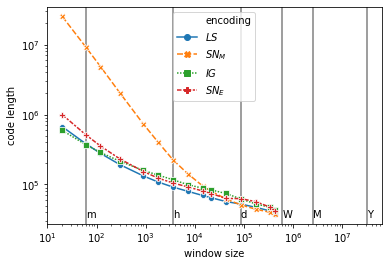

In [23]:
long = pd.melt(SP2012,id_vars=['tts'],value_vars=names)
long["value"]=long["value"]
long["encoding"]=long["variable"]
ax = sns.lineplot(x="tts",y="value",data=long,hue="encoding",markers=True,style="encoding")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("window size")
ax.set_ylabel("code length")
print_lines(long)

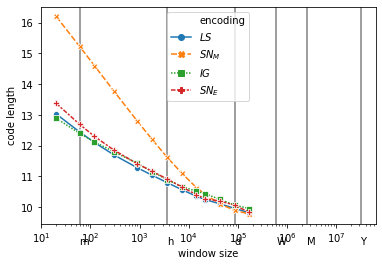

In [24]:
long = pd.melt(Hospital,id_vars=['tts'],value_vars=names)
long["value"]=np.log(long["value"])
long["encoding"]=long["variable"]
ax = sns.lineplot(x="tts",y="value",data=long,hue="encoding",markers=True,style="encoding")
ax.set_xscale('log')
ax.set_xlabel("window size")
ax.set_ylabel("code length")
print_lines(long)

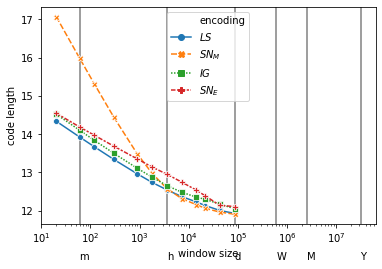

In [25]:
long = pd.melt(Primary_School,id_vars=['tts'],value_vars=names)
long["value"]=np.log(long["value"])
long["encoding"]=long["variable"]
ax = sns.lineplot(x="tts",y="value",data=long,hue="encoding",markers=True,style="encoding")
ax.set_xscale('log')
ax.set_xlabel("window size")
ax.set_ylabel("code length")
print_lines(long)

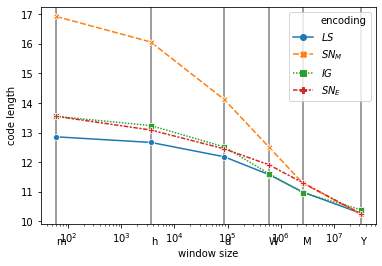

In [36]:
long = pd.melt(ENRON,id_vars=['tts'],value_vars=names)
long["value"]=np.log(long["value"])
long["encoding"]=long["variable"]
ax = sns.lineplot(x="tts",y="value",data=long,hue="encoding",markers=True,style="encoding")
ax.set_xscale('log')
ax.set_xlabel("window size")
ax.set_ylabel("code length")
print_lines(long)

Text(0, 0.5, 'code length')

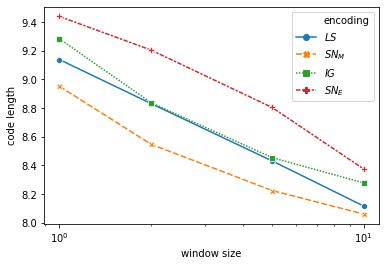

In [27]:
long = pd.melt(primate,id_vars=['tts'],value_vars=names)
long["value"]=np.log(long["value"])
long["encoding"]=long["variable"]
ax = sns.lineplot(x="tts",y="value",data=long,hue="encoding",markers=True,style="encoding")
ax.set_xscale('log')
ax.set_xlabel("window size")
ax.set_ylabel("code length")

Text(0, 0.5, 'code length')

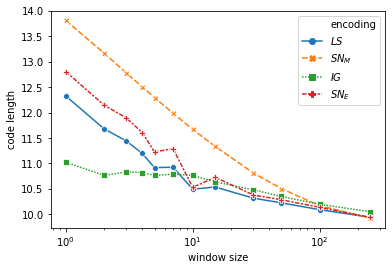

In [28]:
long = pd.melt(GOT,id_vars=['tts'],value_vars=names)
long["value"]=np.log(long["value"])
long["encoding"]=long["variable"]
ax = sns.lineplot(x="tts",y="value",data=long,hue="encoding",markers=True,style="encoding")
ax.set_xscale('log')
ax.set_xlabel("window size")
ax.set_ylabel("code length")

In [45]:
len(gGOT.snapshots_timesteps())

1031

In [ ]:
tn.re

In [32]:
g = tn.graph_socioPatterns_Primary_School(format=tn.DynGraphIG)
g.write_interactions("SP_PS.IG")

graph will be loaded as:  <class 'tnetwork.dyn_graph.dyn_graph_ig.DynGraphIG'>


In [33]:
g = tn.graph_socioPatterns_Primary_School(format=tn.DynGraphSN)
g.write_interactions("SP_PS.SN")

graph will be loaded as:  <class 'tnetwork.dyn_graph.dyn_graph_sn.DynGraphSN'>


In [34]:
g = tn.graph_socioPatterns_Primary_School(format=tn.DynGraphLS)
g.write_interactions("SP_PS.LS")

graph will be loaded as:  <class 'tnetwork.dyn_graph.dyn_graph_ls.DynGraphLS'>


In [37]:
g = tn.read_interactions("/Users/remycazabet/Downloads/ia-enron-employees/ia-enron-employees.edges",format=tn.DynGraphSN,sep=" ",columns=["n1","n2","?","time"])
g.write_interactions("ENRON.SN")

/Users/remycazabet/Documents/GitHub/tnetwork/tnetwork/readwrite/generic_io.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interactions["e"] = interactions.apply(lambda row: tuple(sorted([row[source], row[target]])), axis=1)


graph will be loaded as:  <class 'tnetwork.dyn_graph.dyn_graph_sn.DynGraphSN'>


In [41]:
g = tn.read_interactions("/Users/remycazabet/Downloads/ia-enron-employees/ia-enron-employees.edges",format=tn.DynGraphIG,sep=" ",columns=["n1","n2","?","time"],frequency=60)
g.write_interactions("ENRON.IG")

/Users/remycazabet/Documents/GitHub/tnetwork/tnetwork/readwrite/generic_io.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interactions["e"] = interactions.apply(lambda row: tuple(sorted([row[source], row[target]])), axis=1)


graph will be loaded as:  <class 'tnetwork.dyn_graph.dyn_graph_ig.DynGraphIG'>


In [39]:
g = tn.read_interactions("/Users/remycazabet/Downloads/ia-enron-employees/ia-enron-employees.edges",format=tn.DynGraphLS,sep=" ",columns=["n1","n2","?","time"])
g.write_interactions("ENRON.LS")

graph will be loaded as:  <class 'tnetwork.dyn_graph.dyn_graph_ls.DynGraphLS'>
